In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

3.2 Random Forest

In [3]:
titanic_data = pd.read_csv('titanic_train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data['Survived']
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [5]:
X = pd.get_dummies(X) # сделать из номинативных переменных количественные
X = X.fillna({'Age': X['Age'].median()})
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
rf = RandomForestClassifier()
grid_search_cv = GridSearchCV(rf, {'n_estimators' : [10, 20, 30], 'max_depth' : range(2, 11, 2)}, cv=5)
grid_search_cv.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [8]:
best_rf = grid_search_cv.best_estimator_
Y_pred = best_rf.predict(X_test)
precision_score(Y_test, Y_pred), recall_score(Y_test, Y_pred)

(0.8709677419354839, 0.675)

Вклад независимых переменных в результат классификации

In [9]:
feature_importances = pd.DataFrame({'features' : X_train.columns, 'feature_importances' : best_rf.feature_importances_})
feature_importances = feature_importances.sort_values('feature_importances', ascending=False)
feature_importances.head()

,features,feature_importances
5,Sex_female,0.247971
6,Sex_male,0.201640
4,Fare,0.155230
0,Pclass,0.132333
1,Age,0.129166


То же самое для данных про сердечные заболевания

In [10]:
heart = pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
X_train, Y_train = heart.drop('target', axis=1), heart['target']

In [12]:
np.random.seed(0)

rf = RandomForestClassifier(10, max_depth=5)
grid_search_cv = GridSearchCV(rf, {'n_estimators' : [10, 20, 30], 'max_depth' : range(2, 11, 2)}, cv=5)
grid_search_cv.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_st

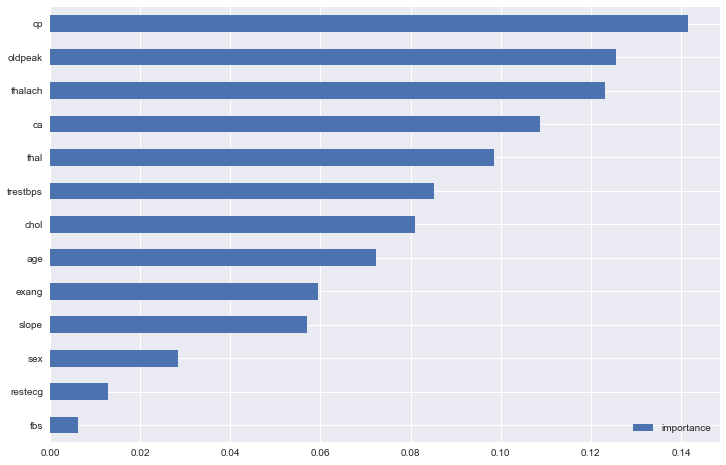

In [13]:
best_rf = grid_search_cv.best_estimator_
imp = pd.DataFrame(best_rf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

3.5 Практика (и на Марсе будут яблони цвести)  
датасет про грибы

In [14]:
mushrooms = pd.read_csv('https://stepik.org/media/attachments/course/4852/training_mush.csv')
mushrooms.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [18]:
X_train, Y_train = mushrooms.drop('class', axis=1), mushrooms['class']

In [16]:
rf = RandomForestClassifier(random_state=0)
grid_search_cv = GridSearchCV(rf, {'n_estimators' : range(10, 51, 10), 
                                   'max_depth' : range(1, 13, 2), 
                                   'min_samples_leaf' : range(1, 8),
                                   'min_samples_split' : range(2, 10, 2)}, cv=3, n_jobs=-1)
grid_search_cv.fit(X_train, Y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [20]:
best_rf = grid_search_cv.best_estimator_
grid_search_cv.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [22]:
feature_importances = pd.DataFrame({'features' : X_train.columns, 'feature_importances' : best_rf.feature_importances_})
feature_importances = feature_importances.sort_values('feature_importances', ascending=False)
feature_importances

,features,feature_importances
4,odor,0.188376
8,gill-color,0.103861
10,stalk-root,0.103793
19,spore-print-color,0.083564
6,gill-spacing,0.080840
18,ring-type,0.070726
3,bruises,0.070109
7,gill-size,0.068461
12,stalk-surface-below-ring,0.048296
20,population,0.043783


In [23]:
X_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/testing_mush.csv')
X_test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [28]:
Y_pred = best_rf.predict(X_test)
np.count_nonzero(Y_pred == 1)

976

In [31]:
Y_test = pd.read_csv('mushrooms_y_test.csv')

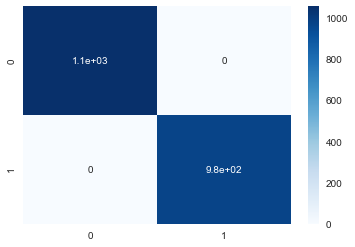

In [34]:
from sklearn.metrics import confusion_matrix
# confusion_matrix(Y_test, Y_pred)
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, cmap="Blues")

датасет про жукеров (???)

In [37]:
df_train = pd.read_csv('https://stepik.org/media/attachments/course/4852/invasion.csv')
df_train.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [44]:
df_train['class'].unique()

array(['transport', 'fighter', 'cruiser'], dtype=object)

In [41]:
df_train.shape

(500, 7)

In [40]:
X_train, Y_train = df_train.drop('class', axis=1), df_train['class']

In [39]:
X_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/operative_information.csv')
X_test.head()

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813


In [48]:
rf = RandomForestClassifier()
grid_search_cv = GridSearchCV(rf, {'n_estimators' : range(10, 51, 10), 
                                   'max_depth' : range(1, 15, 2), 
                                   'min_samples_leaf' : range(10, 50, 10),
                                   'min_samples_split' : range(20, 100, 20)}, cv=3, n_jobs=-1)
grid_search_cv.fit(X_train, Y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [49]:
best_rf = grid_search_cv.best_estimator_
Y_pred = best_rf.predict(X_test)
np.count_nonzero(Y_pred == 'cruiser'), np.count_nonzero(Y_pred == 'transport'), np.count_nonzero(Y_pred == 'fighter')

(230, 595, 675)

In [50]:
feature_importances = pd.DataFrame({'features' : X_train.columns, 'feature_importances' : best_rf.feature_importances_})
feature_importances = feature_importances.sort_values('feature_importances', ascending=False)
feature_importances.head()

,features,feature_importances
5,volume,0.569365
3,brightness,0.179988
0,g_reflection,0.153609
2,speed,0.091922
1,i_reflection,0.004728


опасность космических регионов (вау)

In [51]:
space_regions = pd.read_csv('https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv')
space_regions.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


In [53]:
space_regions.shape

(100000, 8)

In [52]:
X_train, Y_train = space_regions.drop('dangerous', axis=1), space_regions['dangerous']

In [57]:
rf = RandomForestClassifier()
randomized_search_cv = RandomizedSearchCV(rf, {'n_estimators' : range(10, 51, 10), 
                                   'max_depth' : range(1, 15, 2)}, cv=3, n_jobs=-1)
randomized_search_cv.fit(X_train, Y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [58]:
best_rf = randomized_search_cv.best_estimator_
feature_importances = pd.DataFrame({'features' : X_train.columns, 'feature_importances' : best_rf.feature_importances_})
feature_importances = feature_importances.sort_values('feature_importances', ascending=False)
feature_importances.head()

,features,feature_importances
5,buggers_were_noticed,0.535220
6,nearby_system_has_planemo,0.404118
4,black_hole_is_near,0.048710
0,r,0.005117
2,peradventure_index,0.002827


3.7 Трюки в pandas

In [60]:
iris = pd.read_csv('https://stepik.org/media/attachments/course/4852/iris.csv', index_col=0)
iris.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [62]:
%%timeit
iris.mean(axis=0)

847 µs ± 252 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [63]:
%%timeit
iris.apply('mean')

1.2 ms ± 535 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [61]:
%%timeit
iris.apply(np.mean)

6.4 ms ± 1.44 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [64]:
%%timeit
iris.describe().loc['mean']

29.5 ms ± 1.28 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [69]:
wintering = pd.Series([1, 2, 5, 3, 1])
wintering.expanding().sum()

0     1.0
1     3.0
2     8.0
3    11.0
4    12.0
dtype: float64